<a href="https://colab.research.google.com/github/efaro2014/Ml-lab/blob/main/Efrem_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import *
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model  import LogisticRegression 
from sklearn.preprocessing import *
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

In [62]:
import io
heart = 'https://raw.githubusercontent.com/efaro2014/Ml-lab/main/heart_failure_clinical_records_dataset.csv'
heart_failure = pd.read_csv(heart)
heart_failure


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
# check for null values and data types

## check for null values and data types

In [11]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## check for any correlations between the features by using a correlation matrix.

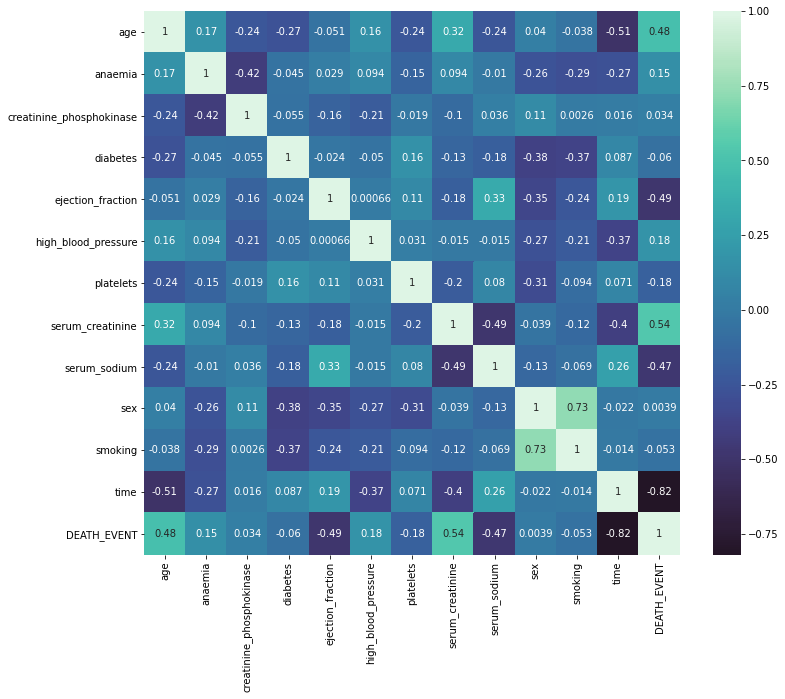

In [13]:
cor_mat=heart_failure.corr()
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(cor_mat.corr(), center=0, cmap='mako', annot=True)

In [84]:
# get features and target 
y = heart_failure['DEATH_EVENT'].values
X = heart_failure.drop(['DEATH_EVENT'], axis=1).copy().values

#Split DATA

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


# Model Fitting 

In [75]:
# Logistic Regression model 
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logistic',     LogisticRegression())])

# pipe = Pipeline([ ('logistic',     LogisticRegression())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 78.33%


In [29]:
hyperparameters = {'C': np.logspace(0, 4, 10),
 'fit_intercept': [False,True],
 'max_iter': [20, 40, 60, 80,100,120],
 'penalty': ['l1', 'l2'],
 'tol': [0.0001, 0.001, 0.01, 0.1]
                  }


In [ ]:

clf_rand = RandomizedSearchCV(estimator=LogisticRegression(), 
                              param_distributions=hyperparameters, 
                              n_iter=30, 
                              cv=5, 
                              verbose=1)
clf_rand.fit(X_train, y_train)

In [34]:
y_pred = clf_rand.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 80.00%


# Random Forest 

In [86]:
hyperparameters = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('RandomForestClassifier',     RandomForestClassifier(**hyperparameters))])

pipe.fit(X_train, y_train)



Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RandomForestClassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=18,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_star

In [87]:
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
acu = accuracy_score(y_test, y_pred)
print(f"mean squared error: {mse:,.4f}")
print(f"accuracy: {acu:,.4f}")

mean squared error: 0.1667
accuracy: 0.8333


## Cross validation for random forest 

In [88]:
# The number of trees in the forest 
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 60, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,4))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 |

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [89]:
y_pred = grid_search.predict(X_test)
acu = accuracy_score(y_test, y_pred)
print(f"accuracy: {acu:,.4f}")

accuracy: 0.8500


# Decision Tree Classifier

In [ ]:

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('decision tree', DecisionTreeClassifier())])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2%}")


# Cross Validation on Decison Tree 

In [ ]:
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,10,12],
             'min_samples_split': list(range(1,8)),
            'min_samples_leaf': list(range(1,8))}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train, y_train);

pred = pipe.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.2%}")


# Feature Importance 
 The most important features are number of follow ups, serum creatinine and ejection fractions

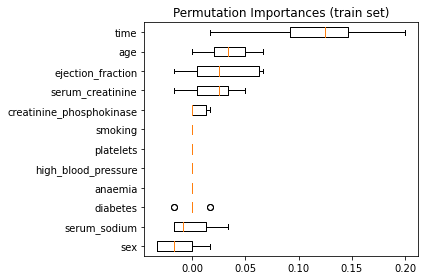

In [69]:
X = heart_failure.drop(['DEATH_EVENT'], axis=1)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state = 0)

r = permutation_importance(pipe, 
                           X_test, y_test, # Using a held-out set makes it possible to highlight which features contribute the most to the generalization power of the inspected model. 
                           n_repeats=10,
                           random_state=42)

sorted_idx = r.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T,
           vert=False, labels=X_tr.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Model Based on Feature Importance(features selected) 

In [79]:
new = heart_failure[['ejection_fraction','time','serum_creatinine','DEATH_EVENT']]
label = new['DEATH_EVENT'].values
features = new.drop(['DEATH_EVENT'], axis=1).copy()
new

,ejection_fraction,time,serum_creatinine,DEATH_EVENT
0,20,4,1.9,1
1,38,6,1.1,1
2,20,7,1.3,1
3,20,7,1.9,1
4,20,8,2.7,1
...,...,...,...,...
294,38,270,1.1,0
295,38,271,1.2,0
296,60,278,0.8,0
297,38,280,1.4,0


In [80]:
X_tr, X_ts, y_tr, y_ts = train_test_split(features, label, test_size=0.2, random_state = 42)


In [81]:
hyperparameters = {'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'warm_start': False}

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('RandomForestClassifier',     RandomForestClassifier(**hyperparameters))])

pipe.fit(X_tr, y_tr)

y_pred = pipe.predict(X_ts)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")


mean squared error: 0.2667
Accuracy: 73.33%


In [ ]:
# Best Selected model R


# Best Selected model Random Forest 

In [90]:
hyperparameters = {'bootstrap': True,
 'max_features': 'auto',
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'verbose': 0,
 'warm_start': False}
 

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('RandomForestClassifier',     RandomForestClassifier(**hyperparameters))])

pipe.fit(X_tr, y_tr)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RandomForestClassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [91]:
pred = pipe.predict(X_ts)
acc = accuracy_score(y_ts, pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 87.78%


# Summary 

The Final selected model is Random Forest with n_estimators=100,  min_samples_leaf=1, min_samples_split=2 and the accuracy score has improved from 83.3 to 87.78. 
Taking a baseline model like Logistic Regression with an accuracy score of 0.78 helped to check how good my model is. The model fiited based on Feature Importance didn't show much improvement in the model performance(the accuracy score was 73.3). 
